In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/union_of_annotations_and_model_scores.csv')

/Users/nthain/Documents/cl/sfu_scripts/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,10,11,16,17,23,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(11366, 70)

In [33]:
MODEL_COLS = ['FLIRTATION_probability', 'GENDER_probability',
       'HEALTH_AGE_DISABILITY_probability', 'RELIGION_probability',
       'RNE_probability', 'SEVERE_TOXICITY_probability',
       'SEXUALLY_EXPLICIT_probability', 'SEXUAL_ORIENTATION_probability',
       'TOXICITY_probability', 'TOXICITY_IDENTITY_HATE_probability',
       'TOXICITY_INSULT_probability', 'TOXICITY_OBSCENE_probability',
       'TOXICITY_THREAT_probability', 'ATTACK_ON_AUTHOR_probability',
       'ATTACK_ON_COMMENTER_probability', 'ATTACK_ON_PUBLISHER_probability',
       'INCOHERENT_probability', 'INFLAMMATORY_probability',
       'LIKELY_TO_REJECT_probability', 'OBSCENE_probability',
       'OFF_TOPIC_probability', 'SPAM_probability',
       'UNSUBSTANTIAL_probability']
ANNOTATION_COLS = ['constructive', 'crowd_toxicity_level']

In [34]:
model_df = df[MODEL_COLS]
annotation_df = df[ANNOTATION_COLS]
both_df = df[MODEL_COLS + ANNOTATION_COLS]

In [36]:
corr_df = both_df.corr(method = 'spearman')[ANNOTATION_COLS]
corr_df

,constructive,crowd_toxicity_level
FLIRTATION_probability,0.188246,0.072467
GENDER_probability,0.113275,0.215463
HEALTH_AGE_DISABILITY_probability,-0.025259,0.289102
RELIGION_probability,0.149824,0.087547
RNE_probability,0.317483,0.062179
SEVERE_TOXICITY_probability,0.024925,0.378953
SEXUALLY_EXPLICIT_probability,0.112856,0.161150
SEXUAL_ORIENTATION_probability,-0.067266,0.157045
TOXICITY_probability,0.042393,0.447929
TOXICITY_IDENTITY_HATE_probability,0.266248,0.229066


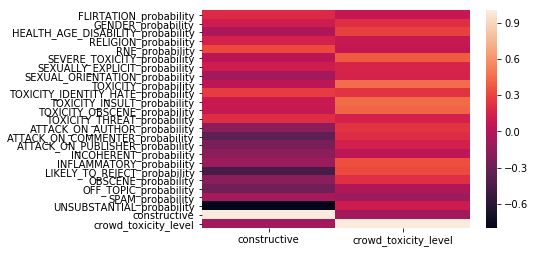

In [22]:
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.index.values)

In [38]:
X = model_df
y = annotation_df['constructive']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()
# TODO(nthain): Compute AUC of predictions and rounded y's?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           constructive   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1182.
Date:                Wed, 15 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:31:13   Log-Likelihood:                 379.47
No. Observations:               11366   AIC:                            -710.9
Df Residuals:                   11342   BIC:                            -534.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.7657      0.012     65.099      0.000       0.743       0.789
FLIRTATION_probability                 0.1321      0.030      4.411      0.000       0.073       0.191
GENDER_probability                     0.1124      0.025      4.518      0.000       0.064       0.161
HEALTH_AGE_DISABILITY_probability      0.0446      0.020      2.229      0.026       0.005       0.084
RELIGION_probability                   0.0444      0.013      3.502      0.000       0.020       0.069
RNE_probability                        0.1142      0.019      6.111      0.000       0.078       0.151
SEVERE_TOXICITY_probability           -0.6150      0.062     -9.906      0.000      -0.737      -0.493
SEXUALLY_EXPLICIT_probability          0.0246      0.040      0.620      0.535      -0.053       0.102
SEXUAL_ORIENTATION_probability         0.0581      0.029      1.981      0.048       0.001       0.116
TOXICITY_probability                  -0.1590      0.058     -2.732      0.006      -0.273      -0.045
TOXICITY_IDENTITY_HATE_probability     0.0915      0.040      2.264      0.024       0.012       0.171
TOXICITY_INSULT_probability            0.0391      0.056      0.700      0.484      -0.070       0.148
TOXICITY_OBSCENE_probability           0.2246      0.055      4.057      0.000       0.116       0.333
TOXICITY_THREAT_probability            0.0828      0.024      3.440      0.001       0.036       0.130
ATTACK_ON_AUTHOR_probability           0.0442      0.012      3.716      0.000       0.021       0.067
ATTACK_ON_COMMENTER_probability       -0.0658      0.010     -6.287      0.000      -0.086      -0.045
ATTACK_ON_PUBLISHER_probability        0.1503      0.013     11.669      0.000       0.125       0.176
INCOHERENT_probability                 0.2042      0.014     14.777      0.000       0.177       0.231
INFLAMMATORY_probability               0.0826      0.015      5.430      0.000       0.053       0.112
LIKELY_TO_REJECT_probability           0.0217      0.016      1.337      0.181      -0.010       0.054
OBSCENE_probability                   -0.1580      0.014    -11.558      0.000      -0.185      -0.131
OFF_TOPIC_probability                 -0.1010      0.021     -4.811      0.000      -0.142      -0.060
SPAM_probability                       0.1914      0.021      9.228      0.000       0.151       0.232
UNSUBSTANTIAL_probability             -1.2429      0.014    -91.930      0.000      -1.269      -1.216
==============================================================================
Omnibus:                      544.082   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.242
Skew:                          -0.516   Prob(JB):                

In [39]:
X = model_df['UNSUBSTANTIAL_probability']
y = annotation_df['constructive']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()
# TODO(nthain): Compute AUC of predictions and rounded y's?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           constructive   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 2.201e+04
Date:                Wed, 15 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:20:17   Log-Likelihood:                -446.20
No. Observations:               11366   AIC:                             896.4
Df Residuals:                   11364   BIC:                             911.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9774      0.004    252.752      0.000       0.970       0.985
UNSUBSTANTIAL_probability    -1.2362      0.008   -148.355      0.000      -1.253      -1.220
==============================================================================
Omnibus:                      515.745   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.603
Skew:                          -0.455   Prob(JB):                    2.96e-150
Kurtosis:                       3.791   Cond. No.                         4.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = model_df
y = annotation_df['crowd_toxicity_level']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     crowd_toxicity_level   R-squared:                       0.294
Model:                              OLS   Adj. R-squared:                  0.293
Method:                   Least Squares   F-statistic:                     205.7
Date:                  Wed, 15 Aug 2018   Prob (F-statistic):               0.00
Time:                          11:19:29   Log-Likelihood:                -3883.6
No. Observations:                 11366   AIC:                             7815.
Df Residuals:                     11342   BIC:                             7991.
Df Model:                            23                                         
Covariance Type:              nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.0764      0.017     62.895      0.000       1.043       1.110
FLIRTATION_probability                 0.0296      0.044      0.680      0.497      -0.056       0.115
GENDER_probability                    -0.0431      0.036     -1.189      0.234      -0.114       0.028
HEALTH_AGE_DISABILITY_probability     -0.0103      0.029     -0.353      0.724      -0.067       0.047
RELIGION_probability                   0.0009      0.018      0.048      0.962      -0.035       0.037
RNE_probability                        0.0209      0.027      0.769      0.442      -0.032       0.074
SEVERE_TOXICITY_probability            0.6246      0.090      6.913      0.000       0.447       0.802
SEXUALLY_EXPLICIT_probability         -0.2231      0.058     -3.869      0.000      -0.336      -0.110
SEXUAL_ORIENTATION_probability         0.0179      0.043      0.419      0.675      -0.066       0.102
TOXICITY_probability                   0.6723      0.085      7.936      0.000       0.506       0.838
TOXICITY_IDENTITY_HATE_probability    -0.5190      0.059     -8.825      0.000      -0.634      -0.404
TOXICITY_INSULT_probability            0.6243      0.081      7.687      0.000       0.465       0.783
TOXICITY_OBSCENE_probability          -0.3521      0.081     -4.371      0.000      -0.510      -0.194
TOXICITY_THREAT_probability           -0.2339      0.035     -6.682      0.000      -0.303      -0.165
ATTACK_ON_AUTHOR_probability           0.0662      0.017      3.827      0.000       0.032       0.100
ATTACK_ON_COMMENTER_probability       -0.0230      0.015     -1.510      0.131      -0.053       0.007
ATTACK_ON_PUBLISHER_probability        0.0067      0.019      0.360      0.719      -0.030       0.043
INCOHERENT_probability                 0.0021      0.020      0.103      0.918      -0.037       0.041
INFLAMMATORY_probability               0.1288      0.022      5.824      0.000       0.085       0.172
LIKELY_TO_REJECT_probability           0.1514      0.024      6.403      0.000       0.105       0.198
OBSCENE_probability                   -0.0784      0.020     -3.943      0.000      -0.117      -0.039
OFF_TOPIC_probability                 -0.1250      0.031     -4.093      0.000      -0.185      -0.065
SPAM_probability                      -0.0221      0.030     -0.731      0.465      -0.081       0.037
UNSUBSTANTIAL_probability             -0.0342      0.020     -1.737      0.082      -0.073       0.004
==============================================================================
Omnibus:                     3436.666   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10551.786
Skew:                           1.564   Pro